<a href="https://colab.research.google.com/github/ovieimara/ITNPBD4/blob/master/BD4_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BEFORE you start:
## if you need to change code, duplicate the Colab cell before
## you are allowed the use of GAI (Gemini) to debug if you are stuck. BUT use with caution as it may misunderstand 'small' problems due to csv structure or specifics of your data

You need to import datasets in Google Colab first

In [1]:
from google.colab import files
uploaded = files.upload()

Saving airline-passengers.csv to airline-passengers.csv
Saving daily-total-female-births.csv to daily-total-female-births.csv
Saving monthly-beer-production-in-austr.csv to monthly-beer-production-in-austr.csv
Saving monthly-sunspots.csv to monthly-sunspots.csv


If you click on the "folder" icon you should be able to see the files.
The path for your .csv in Colab (unless you create a directory) by default will be: "/content/filename.csv"

In [7]:
import pandas as pd

# Load the data
data = pd.read_csv("/content/monthly-beer-production-in-austr.csv")

#The following examples are set with "content/monthly-beer-production-in-austr.csv"
#You will have to test other Datasets. Be mindful to check first whether the csv structure is the same, or CHANGE the code, for instance if the Dataset does not use a 'Month' column

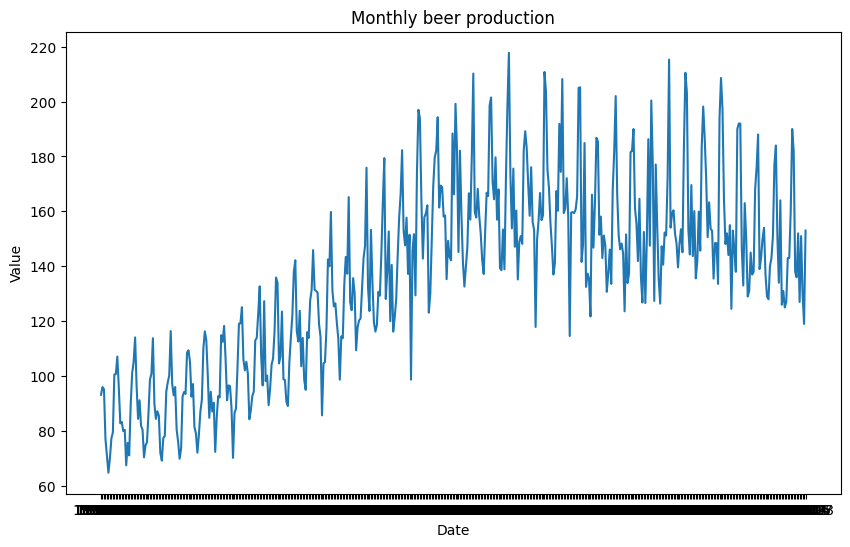

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('/content/monthly-beer-production-in-austr.csv')

plt.figure(figsize=(10, 6))
# Assuming 'Month' is the date column and 'Monthly beer production' is the value column
plt.plot(data['Month'], data['Monthly beer production'])
plt.title('Monthly beer production')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

<Figure size 1000x800 with 0 Axes>

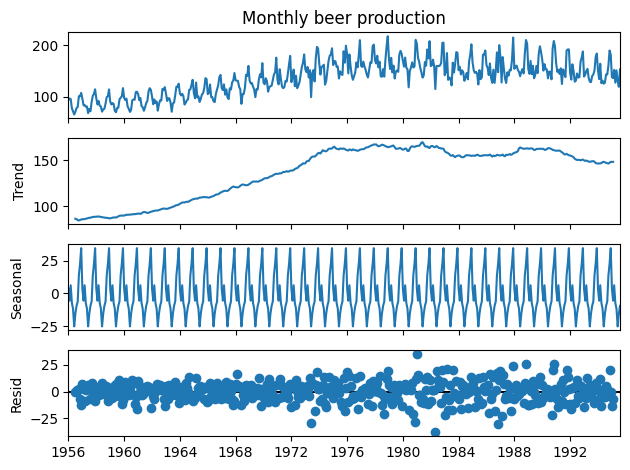

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_csv('/content/monthly-beer-production-in-austr.csv')

# Convert 'Month' column to datetime objects
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as index
data.set_index('Month', inplace=True)

# Decompose the time series, using the 'Monthly beer production' column
decomposition = seasonal_decompose(data['Monthly beer production'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()


In [10]:
display(data)

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


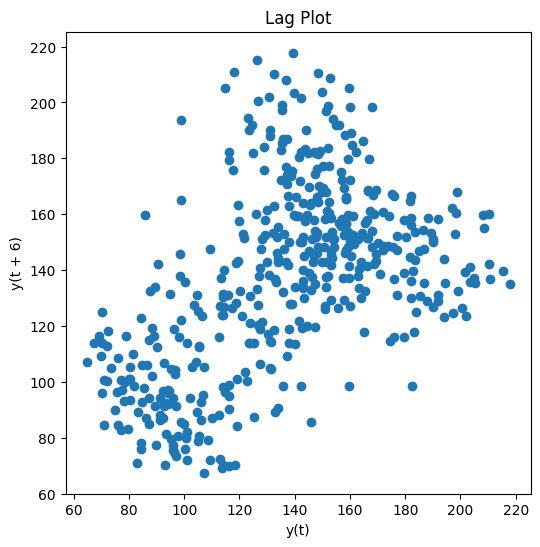

In [13]:
from pandas.plotting import lag_plot

lag_value = 6

plt.figure(figsize=(6, 6))
lag_plot(data, lag=lag_value)
plt.title('Lag Plot')
plt.show()


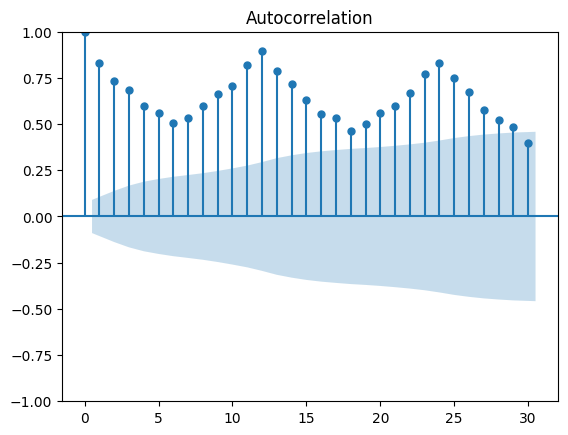

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, lags=30)
plt.show()


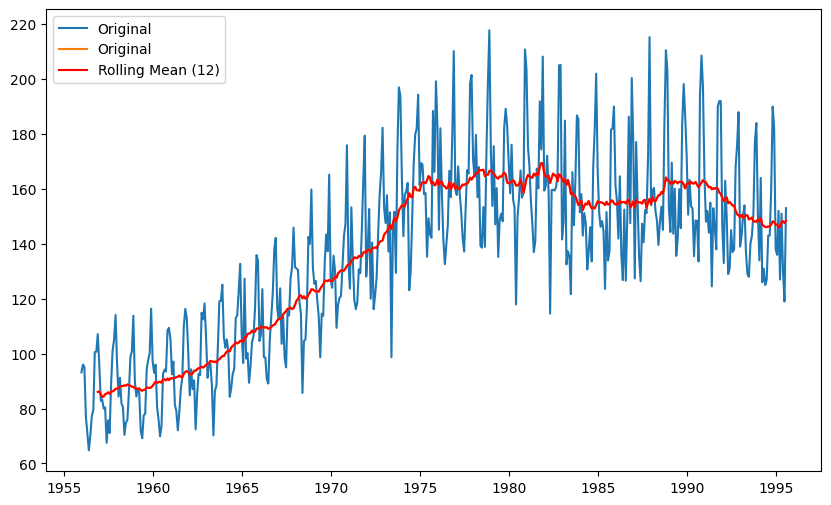

In [16]:
# Load the data
data = pd.read_csv('/content/monthly-beer-production-in-austr.csv')

# Convert 'Month' column to datetime objects
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as index
data.set_index('Month', inplace=True)

data['Rolling Mean'] = data.rolling(window=12).mean()  # Adjust window as needed

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(data['Rolling Mean'], color='red', label='Rolling Mean (12)')
plt.legend()
plt.show()


#Stationarity I

Stationarity is a fundamental concept in time series analysis, where a time series is considered stationary if its properties, such as mean and variance, do not change over time. Many time series models, especially traditional ones like ARIMA, assume that the data is stationary. Non-stationary data often needs to be transformed (e.g., through differencing) to become stationary.
Types of Stationary and Non-Stationary Time Series

    Stationary Series: Does not have trends, seasonality, or changing variances over time. Its statistical properties, like mean and variance, are constant.
        Example: A time series with random white noise (e.g., random fluctuations around a constant mean).
    Non-Stationary Series: Has trends, seasonality, or varying variance over time.
        Example: A time series showing a clear upward or downward trend over time (e.g., a sales series growing monthly).

Testing for Stationarity

The Augmented Dickey-Fuller (ADF) test is a commonly used test to check for stationarity.

    Null Hypothesis (H0): The time series is non-stationary.
    Alternative Hypothesis (H1): The time series is stationary.

If the p-value from the ADF test is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary.


#These are the LECTURE examples with generated data to create stationary and non-stationary TS

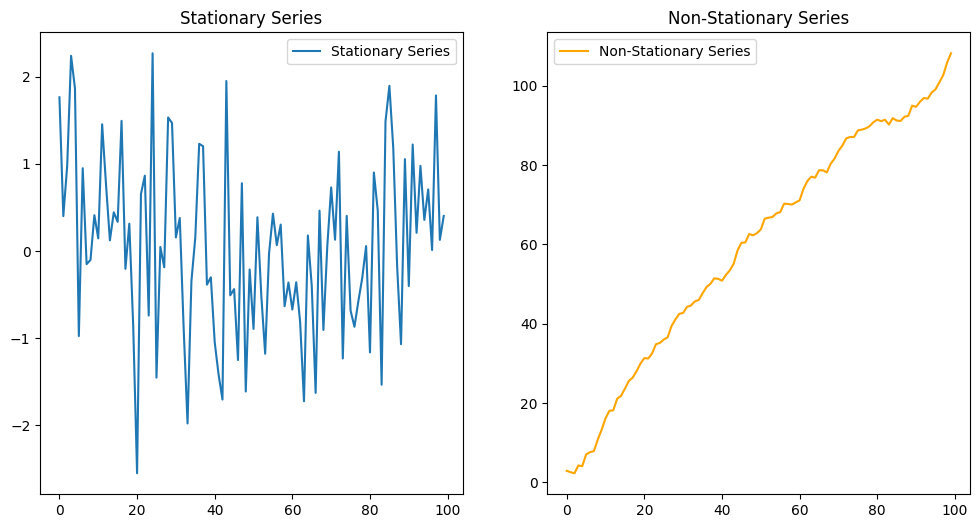

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a stationary time series (white noise)
np.random.seed(0)
stationary_series = np.random.normal(loc=0, scale=1, size=100)

# Generate a non-stationary time series (random walk)
non_stationary_series = np.cumsum(np.random.normal(loc=1, scale=1, size=100))

# Plot both series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(stationary_series, label='Stationary Series')
plt.title('Stationary Series')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(non_stationary_series, color='orange', label='Non-Stationary Series')
plt.title('Non-Stationary Series')
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, series_name):
    adf_result = adfuller(series)
    print(f"ADF Test for {series_name}:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f'Critical Value {key}: {value}')
    print("Conclusion:", "Stationary" if adf_result[1] < 0.05 else "Non-Stationary", "\n")

# Test both series
test_stationarity(stationary_series, "Stationary Series")
test_stationarity(non_stationary_series, "Non-Stationary Series")


ADF Test for Stationary Series:
ADF Statistic: -9.298574759765579
p-value: 1.1285451053950947e-15
Critical Value 1%: -3.498198082189098
Critical Value 5%: -2.891208211860468
Critical Value 10%: -2.5825959973472097
Conclusion: Stationary 

ADF Test for Non-Stationary Series:
ADF Statistic: -1.5804394707942526
p-value: 0.49341151515614495
Critical Value 1%: -3.498198082189098
Critical Value 5%: -2.891208211860468
Critical Value 10%: -2.5825959973472097
Conclusion: Non-Stationary 



ADF Test for Differenced Non-Stationary Series:
ADF Statistic: -9.58418655880123
p-value: 2.1188596452647235e-16
Critical Value 1%: -3.4989097606014496
Critical Value 5%: -2.891516256916761
Critical Value 10%: -2.5827604414827157
Conclusion: Stationary 



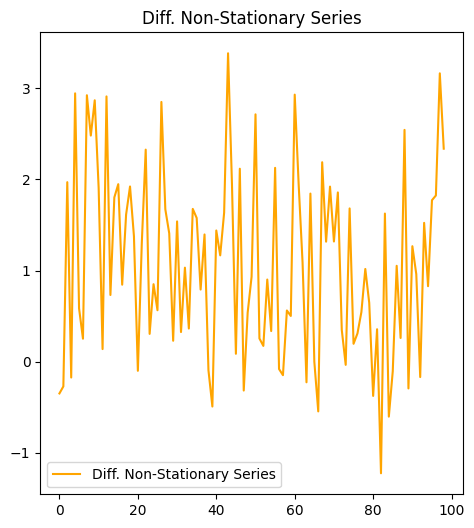

In [24]:
# Differencing the non-stationary series to make it stationary
differenced_series = np.diff(non_stationary_series)

# Test the differenced series
test_stationarity(differenced_series, "Differenced Non-Stationary Series")

# Plot both series
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(differenced_series, color='orange', label='Diff. Non-Stationary Series')
plt.title('Diff. Non-Stationary Series')
plt.legend()
plt.show()

# Now you can try to apply this to real data
You need to inspect the .csv
In the following example the time values are 'Date' (but they could be 'Months') and the value you want to decompos is 'Name' (in the "daily-total-female-births.csv" Time series it would be 'Births')

<Figure size 1000x800 with 0 Axes>

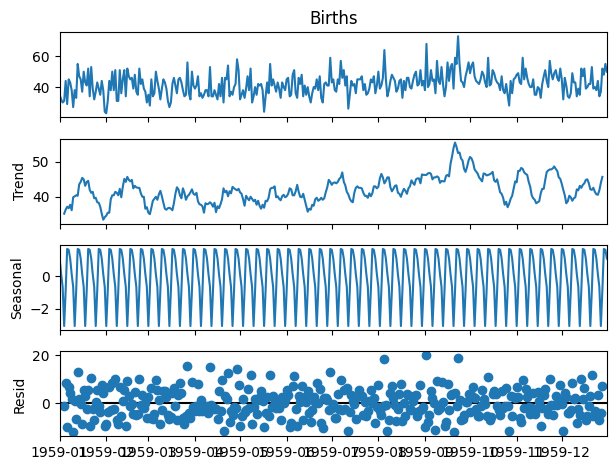

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_csv("/content/daily-total-female-births.csv")

# Convert 'Date' column to datetime objects, assuming the date column is named 'Date'
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index
data.set_index('Date', inplace=True)

# Assuming 'Name' is the column you want to decompose
decomposition = seasonal_decompose(data['Births'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.show()

In [27]:
display(data)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [50]:
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv("/content/daily-total-female-births.csv", header=0, index_col=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# print(result[0])


ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [58]:
file = "/content/airline-passengers.csv"
series = pd.read_csv(file, header=0, index_col=0)
display(series)

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [61]:
series['Month'] = pd.to_datetime(series.index)
# series.set_index('Month', inplace=True)
display(series)

,Passengers,Month
Month,,
1949-01,112,1949-01-01
1949-02,118,1949-02-01
1949-03,132,1949-03-01
1949-04,129,1949-04-01
1949-05,121,1949-05-01
...,...,...
1960-08,606,1960-08-01
1960-09,508,1960-09-01
1960-10,461,1960-10-01


In [63]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

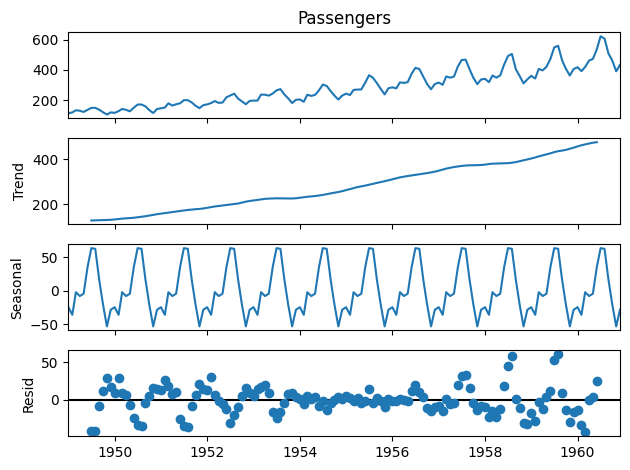

In [65]:
series.set_index('Month', inplace=True)
decomposition = seasonal_decompose(series['Passengers'], model='additive')
decomposition.plot()
plt.show()


In [67]:
adfuller_result = adfuller(series)
print(adfuller_result)
print('ADF Statistic:', adfuller_result[0])
print('p-value:', adfuller_result[1])

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


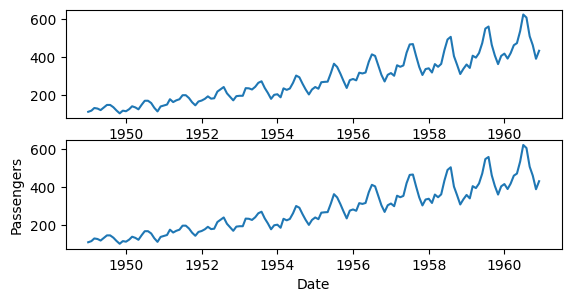

In [81]:
plt.subplot(3, 1, 1)
plt.plot(series)
plt.subplot(3, 1, 2)
plt.plot(series.index, series['Passengers'])
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()